     pcost       dcost       gap    pres   dres
 0:  1.2279e+03 -1.3111e+04  1e+04  3e-14  9e-15
 1:  1.1798e+02 -1.5089e+03  2e+03  2e-14  8e-15
 2: -2.2267e+02 -4.9527e+02  3e+02  7e-15  4e-15
 3: -2.9686e+02 -4.0621e+02  1e+02  1e-14  5e-15
 4: -3.0744e+02 -3.7129e+02  6e+01  1e-14  6e-15
 5: -3.3295e+02 -3.4899e+02  2e+01  2e-16  7e-15
 6: -3.4016e+02 -3.4210e+02  2e+00  2e-16  1e-14
 7: -3.4089e+02 -3.4091e+02  2e-02  2e-16  1e-14
 8: -3.4090e+02 -3.4090e+02  2e-04  1e-14  1e-14
 9: -3.4090e+02 -3.4090e+02  2e-06  1e-14  9e-15
10: -3.4090e+02 -3.4090e+02  2e-08  3e-14  7e-15
Optimal solution found.


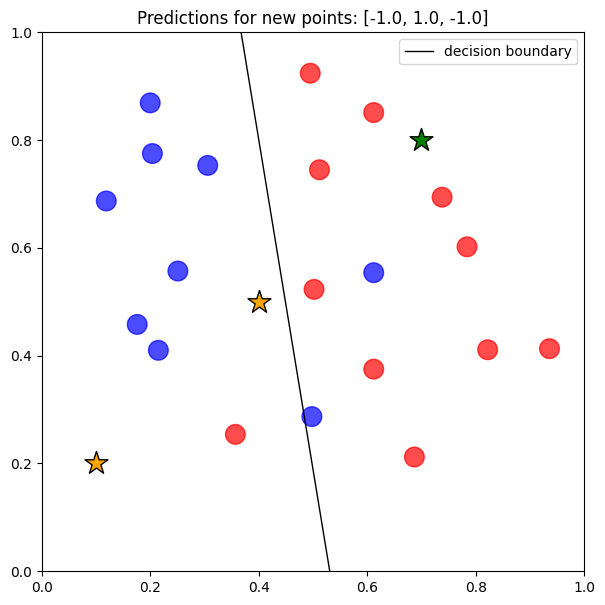


Margin = 0.3000


In [3]:
import numpy as np
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import matplotlib.pyplot as plt

# training data
x = np.array([[0.2,   0.869],
              [0.687, 0.212],
              [0.822, 0.411],
              [0.738, 0.694],
              [0.176, 0.458],
              [0.306, 0.753],
              [0.936, 0.413],
              [0.215, 0.410],
              [0.612, 0.375],
              [0.784, 0.602],
              [0.612, 0.554],
              [0.357, 0.254],
              [0.204, 0.775],
              [0.512, 0.745],
              [0.498, 0.287],
              [0.251, 0.557],
              [0.502, 0.523],
              [0.119, 0.687],
              [0.495, 0.924],
              [0.612, 0.851]])

y = np.array([-1,1,1,1,-1,-1,1,-1,1,1,-1,1,-1,1,-1,-1,1,-1,1,1])
y = y.astype('float').reshape(-1, 1)

# ---- Calculate lambda using cvxopt ----

C = 50.0
N = x.shape[0]

# Construct the matrices required for QP in standard form
H = np.outer(y, y) * np.dot(x, x.T)
P = cvxopt_matrix(H)
q = cvxopt_matrix(np.ones(N) * -1)
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

g = np.vstack([-np.eye(N), np.eye(N)])
G = cvxopt_matrix(g)

h1 = np.hstack([np.zeros(N), np.ones(N) * C])
h = cvxopt_matrix(h1)

# solver parameters
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

# Perform QP
sol = cvxopt_solvers.qp(P, q, G, h, A, b)

# the solution to the QP, λ
lamb = np.array(sol['x'])

# Calculate w using the lambda, which is the solution to QP
w = np.sum(lamb * y * x, axis=0)

# Find support vectors
sv_idx = np.where(lamb > 1e-5)[0]
sv_lamb = lamb[sv_idx]
sv_x = x[sv_idx]
sv_y = y[sv_idx]

# Calculate b using the support vectors and calculate the average
b = np.mean([sv_y[i] - np.dot(w, sv_x[i]) for i in range(len(sv_x))])

# Function to predict the class of a point
def predict(x_new):
    return np.sign(np.dot(w, x_new) + b)

# Testing with some new points
new_points = np.array([[0.4, 0.5], [0.7, 0.8], [0.1, 0.2]])
predictions = [predict(p) for p in new_points]

# Visualize the data points and decision boundary
plt.figure(figsize=(7, 7))
color = ['red' if a == 1 else 'blue' for a in y]
plt.scatter(x[:, 0], x[:, 1], s=200, c=color, alpha=0.7)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Decision boundary visualization
x1_dec = np.linspace(0, 1, 100)
x2_dec = -(w[0] * x1_dec + b) / w[1]
plt.plot(x1_dec, x2_dec, c='black', lw=1.0, label='decision boundary')

# Visualizing the new points and their predictions
for p, pred in zip(new_points, predictions):
    color_pred = 'green' if pred == 1 else 'orange'
    plt.scatter(p[0], p[1], s=300, marker='*', c=color_pred, edgecolors='black')

plt.legend()
plt.title(f'Predictions for new points: {predictions}')
plt.show()
result3 = print("\nMargin = {:.4f}".format(half_margin * 2))
result3